# **WEEK 3**

**UNIVARIATE VISUAL ANALYSIS**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('Cleaned_Dataset.csv')
sns.set(style="whitegrid")


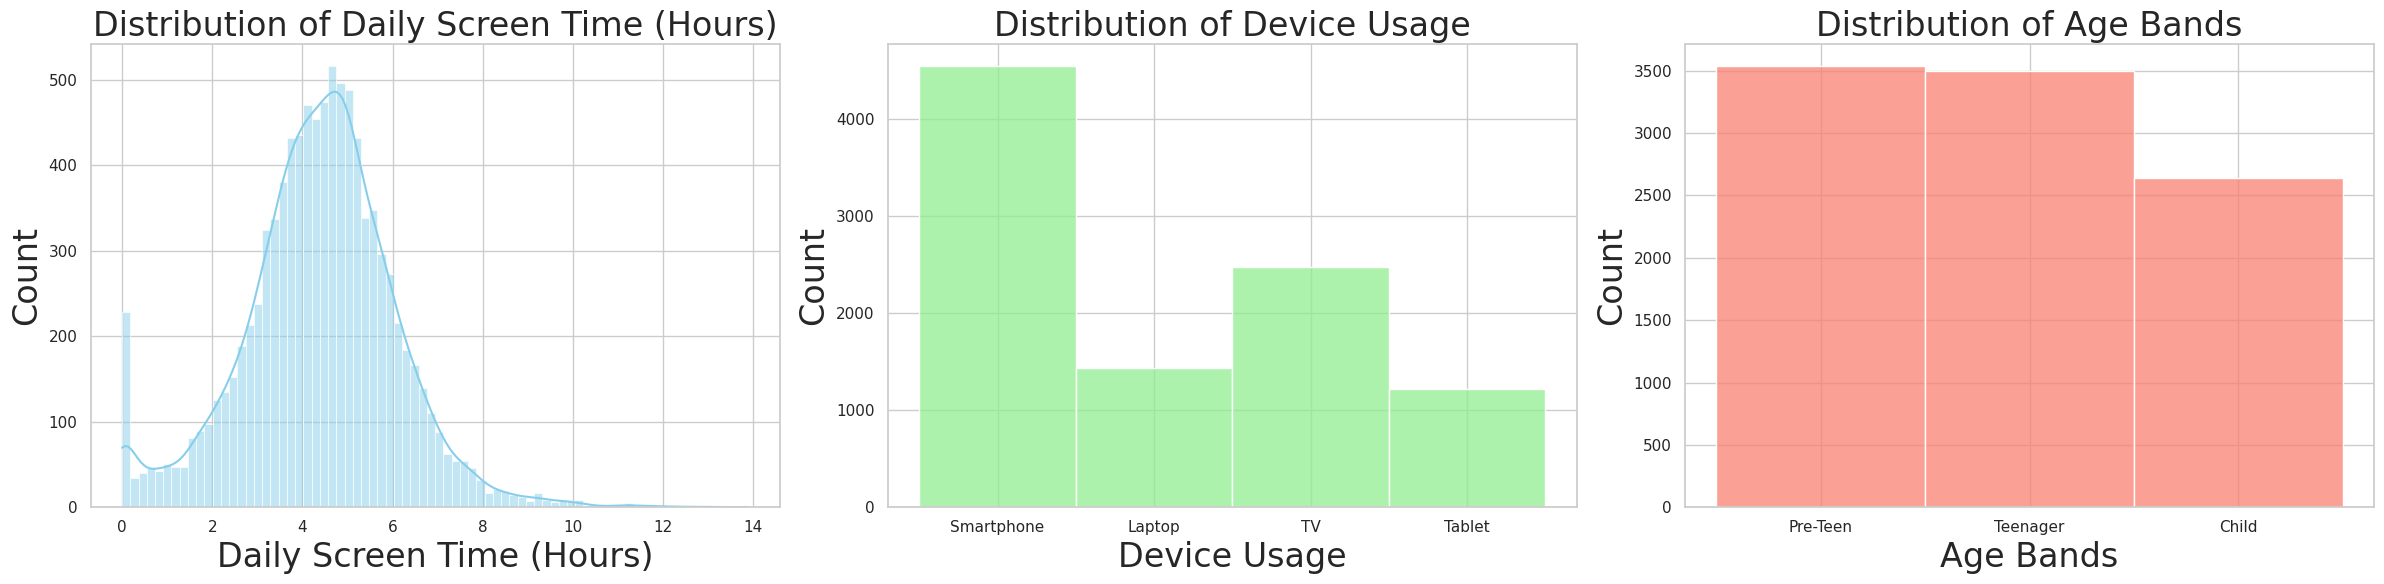

In [45]:
# Histogram for univariate analysis
columns_to_plot = [
    ('Avg_Daily_Screen_Time_hr', 'Daily Screen Time (Hours)'),
    ('Primary_Device', 'Device Usage'),
    ('Age_Band', 'Age Bands')
]
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=False)
for i, (column, xlabel) in enumerate(columns_to_plot):
    if i == 0:
        sns.histplot(data[column], kde=True, ax=axes[i], color='skyblue')
    elif i == 1:
        sns.histplot(data[column], kde=False, ax=axes[i], color='lightgreen')
    else:
        sns.histplot(data[column], kde=False, ax=axes[i], color='salmon')
    axes[i].set_title(f"Distribution of {xlabel}",fontsize=24)
    axes[i].set_xlabel(xlabel,fontsize=24)
    axes[i].set_ylabel("Count",fontsize=24)

plt.tight_layout()
plt.show()

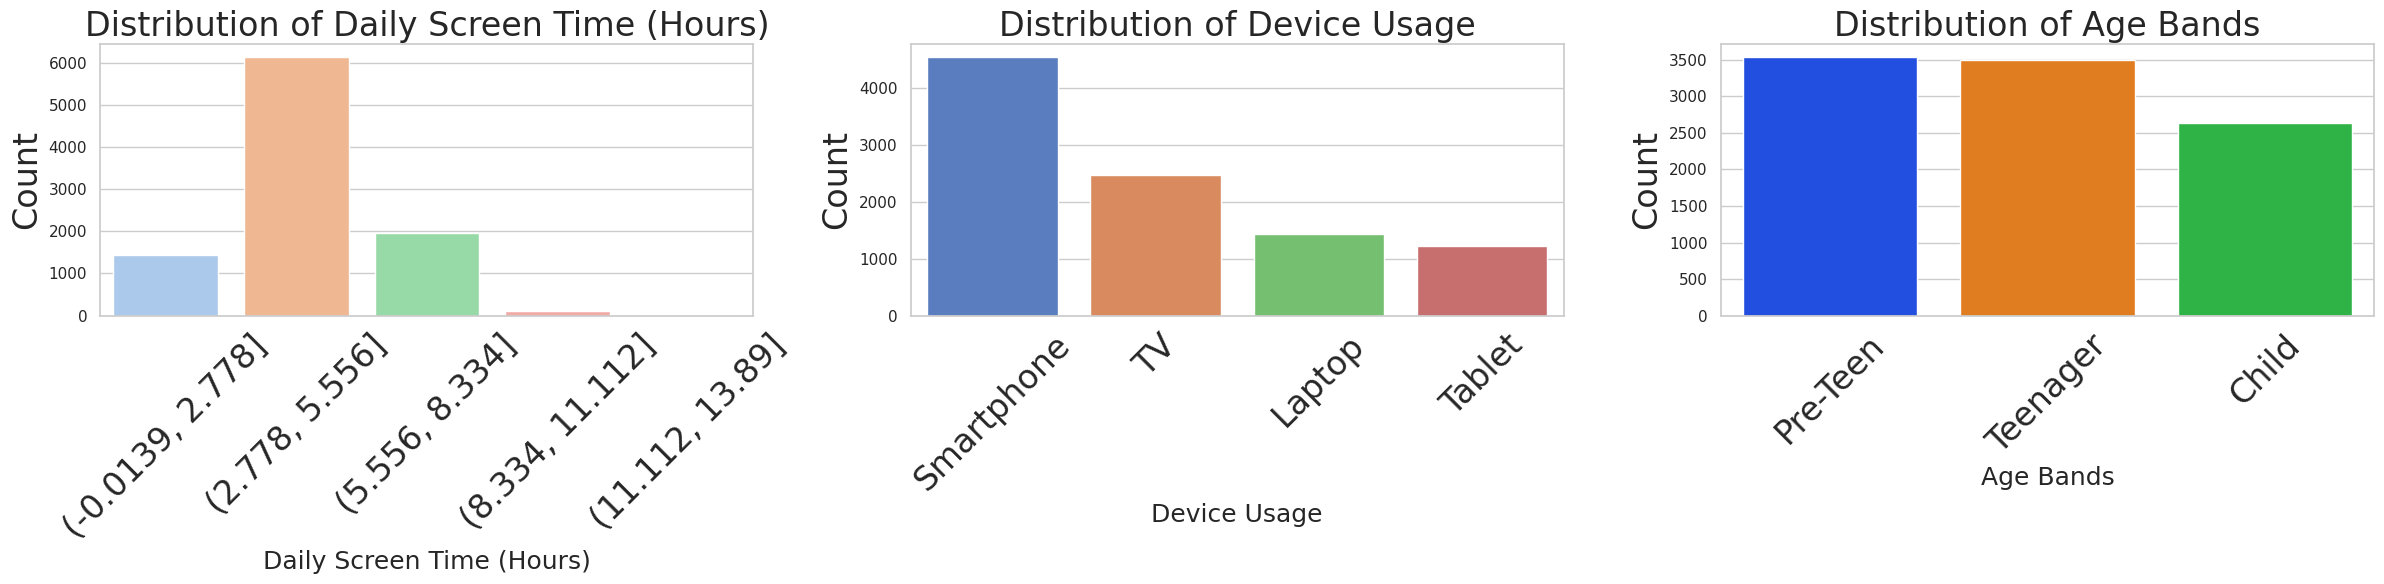

In [46]:
# Bar chart for Univariate Analysis
columns_to_plot = [
    ('Avg_Daily_Screen_Time_hr', 'Daily Screen Time (Hours)'),
    ('Primary_Device', 'Device Usage'),
    ('Age_Band', 'Age Bands')]
fig, axes = plt.subplots(1, 3, figsize=(24,6), sharey=False)
for i, (column, xlabel) in enumerate(columns_to_plot):
    if column == 'Avg_Daily_Screen_Time_hr':
        bins = pd.cut(data[column], bins=5)
        value_counts = bins.value_counts().sort_index()
        sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, ax=axes[i], hue=value_counts.index.astype(str), palette='pastel', legend=False)
        axes[i].tick_params(axis='x', rotation=45,labelsize=24)
    else:
        value_counts = data[column].value_counts()
        if column == 'Primary_Device':
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], hue=value_counts.index, palette='muted', legend=False)
        else:
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], hue=value_counts.index, palette='bright', legend=False)
        axes[i].tick_params(axis='x', rotation=45,labelsize=24)

    axes[i].set_title(f"Distribution of {xlabel}",fontsize=24)
    axes[i].set_xlabel(xlabel,fontsize=18)
    axes[i].set_ylabel("Count",fontsize=24)

plt.tight_layout()
plt.show()

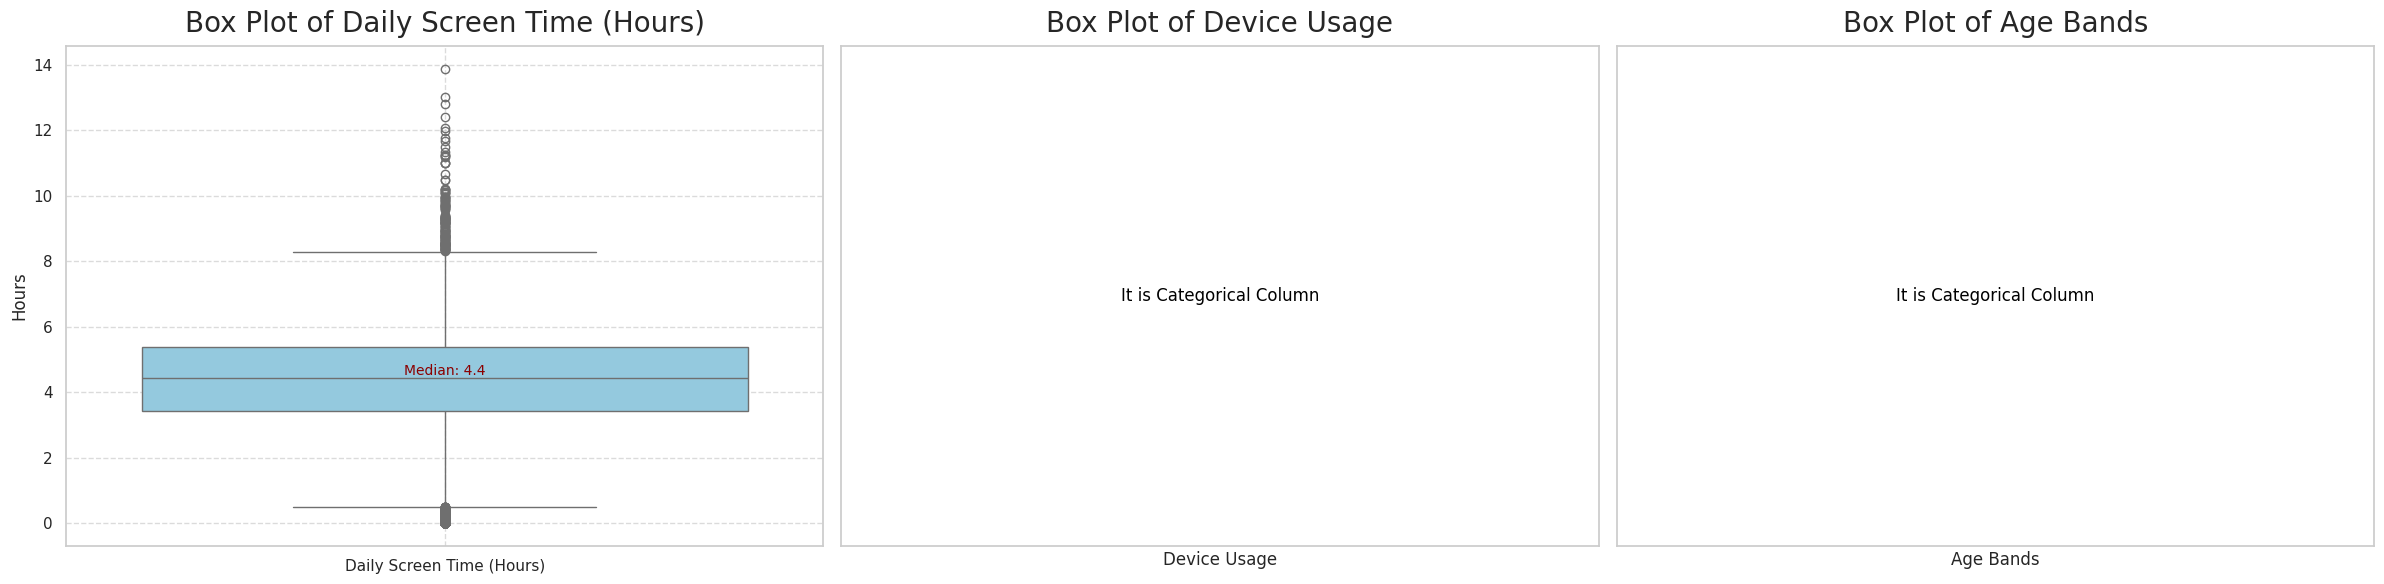

In [47]:
# Box plot for Univariate Analysis
columns_to_plot = [
    ('Avg_Daily_Screen_Time_hr', 'Daily Screen Time (Hours)'),
    ('Primary_Device', 'Device Usage'),
    ('Age_Band', 'Age Bands')]
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=False)
for i, (column, xlabel) in enumerate(columns_to_plot):
    if column == 'Avg_Daily_Screen_Time_hr':
        # Box plot for numerical data
        sns.boxplot(y=data[column], ax=axes[i], color='skyblue')
        axes[i].set_ylabel("Hours")
        axes[i].set_xticks([0])
        axes[i].set_xticklabels([xlabel])
        median = data[column].median()
        axes[i].text(0, median, f'Median: {median:.1f}', horizontalalignment='center',
                     verticalalignment='bottom', fontsize=10, color='darkred')
    else:
        # Display text for categorical columns
        axes[i].text(0.5, 0.5, "It is Categorical Column",
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=12, color='black', transform=axes[i].transAxes)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_xlabel(xlabel)

    axes[i].set_title(f"Box Plot of {xlabel}", fontsize=20, pad=10)
    axes[i].grid(True, linestyle='--', alpha=0.7) if column == 'Avg_Daily_Screen_Time_hr' else None

plt.tight_layout()
plt.show()

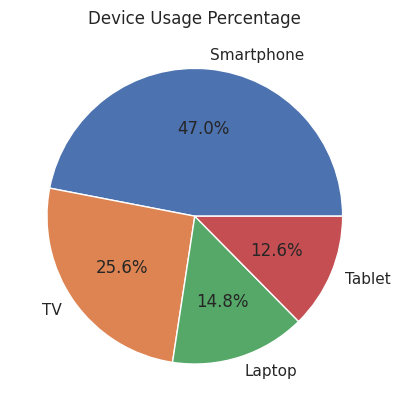

In [48]:
# Pie chart for Device Usuage
data['Primary_Device'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', ylabel=''
)
plt.title("Device Usage Percentage")
plt.show()


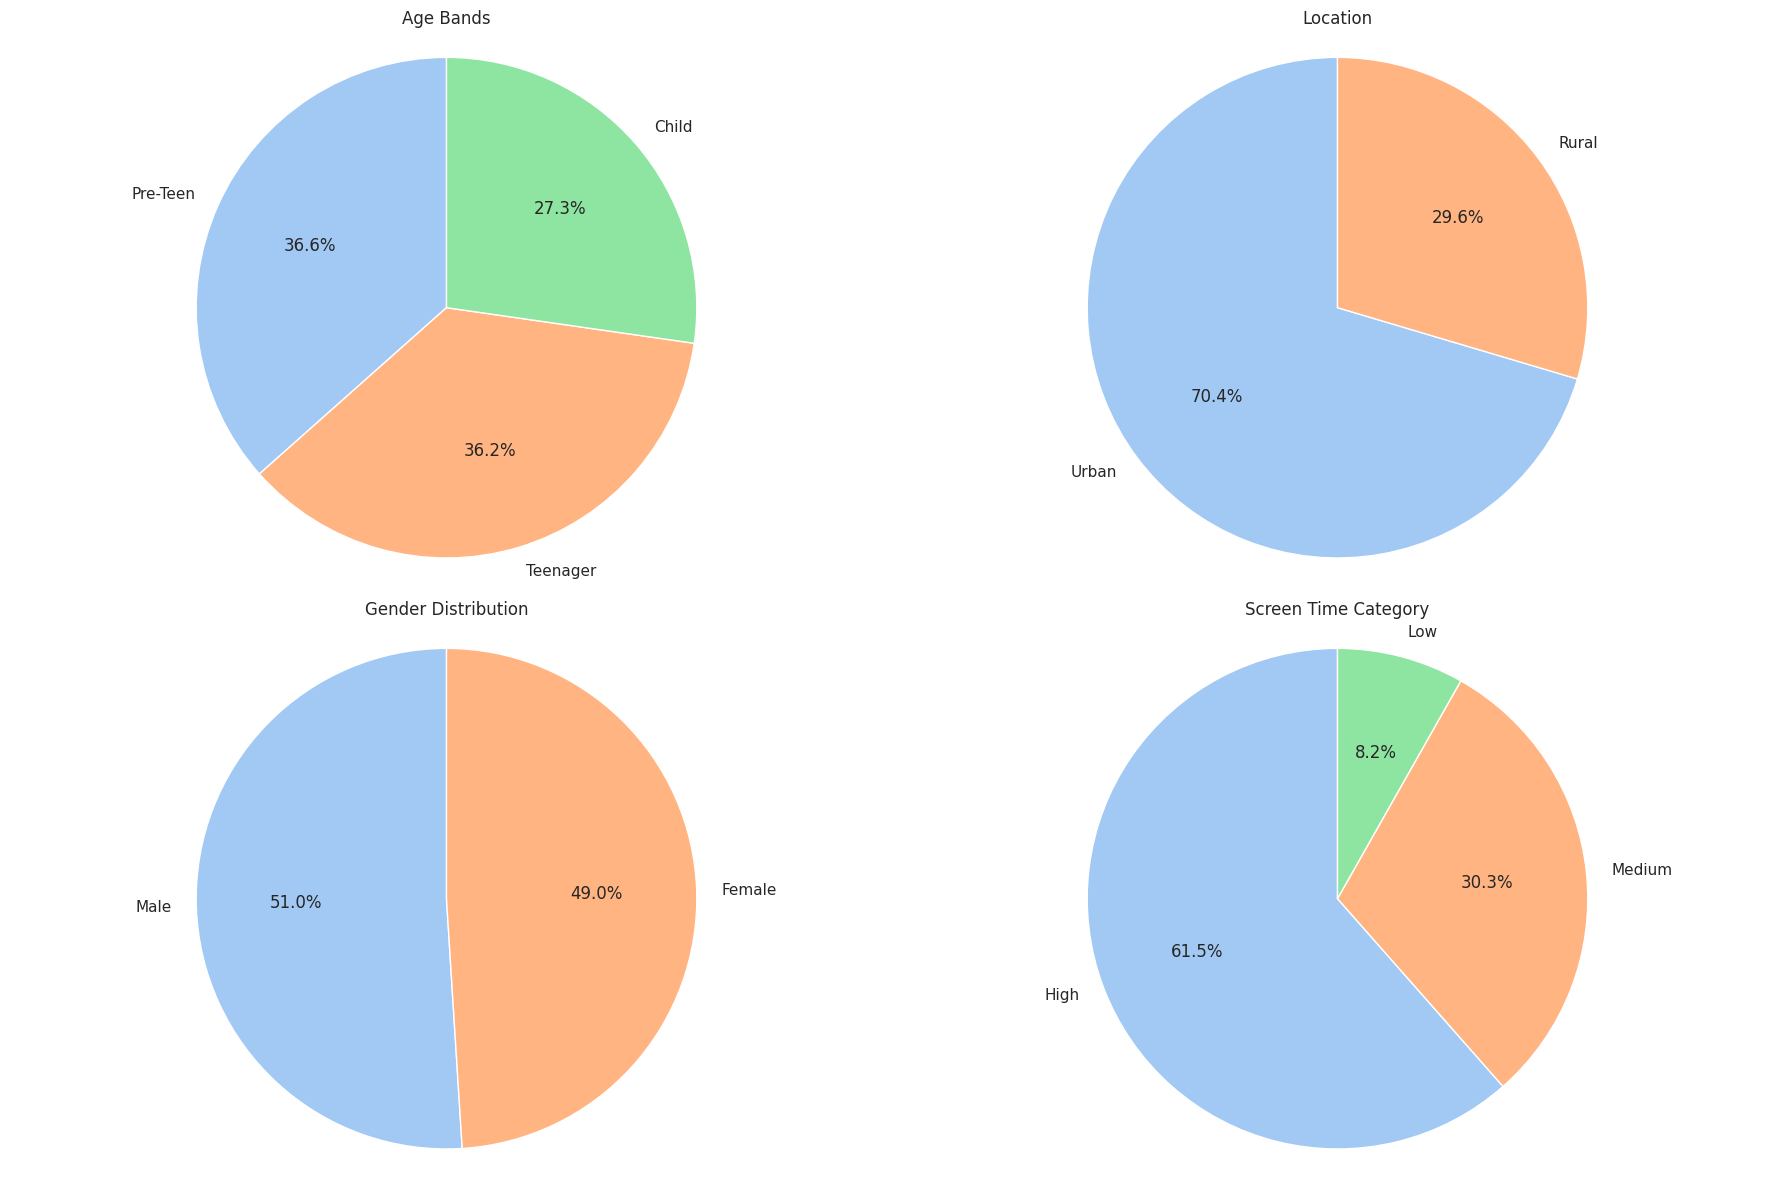

In [49]:
# Categorical columns to analyze with pie charts
columns_to_plot = [
    ('Age_Band', 'Age Bands'),
    ('Urban_or_Rural', 'Location'),
    ('Gender', 'Gender Distribution'),
    ('Screen_Time_Category', 'Screen Time Category')]
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()
for i, (column, title) in enumerate(columns_to_plot):
    value_counts = data[column].value_counts()
    percentages = (value_counts / value_counts.sum() * 100).round(1)
    axes[i].pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[i].set_title(title)
    axes[i].axis('equal')
axes[-1].axis('off')

plt.tight_layout()
plt.show()

**Interpretation**

Median of Average Screen time is 4.4 hours.

Pre-Teen and Teenagers are used more than children.

Mostly Smart phones are used by the users.

**BIVARIATE VISUAL ANALYSIS**

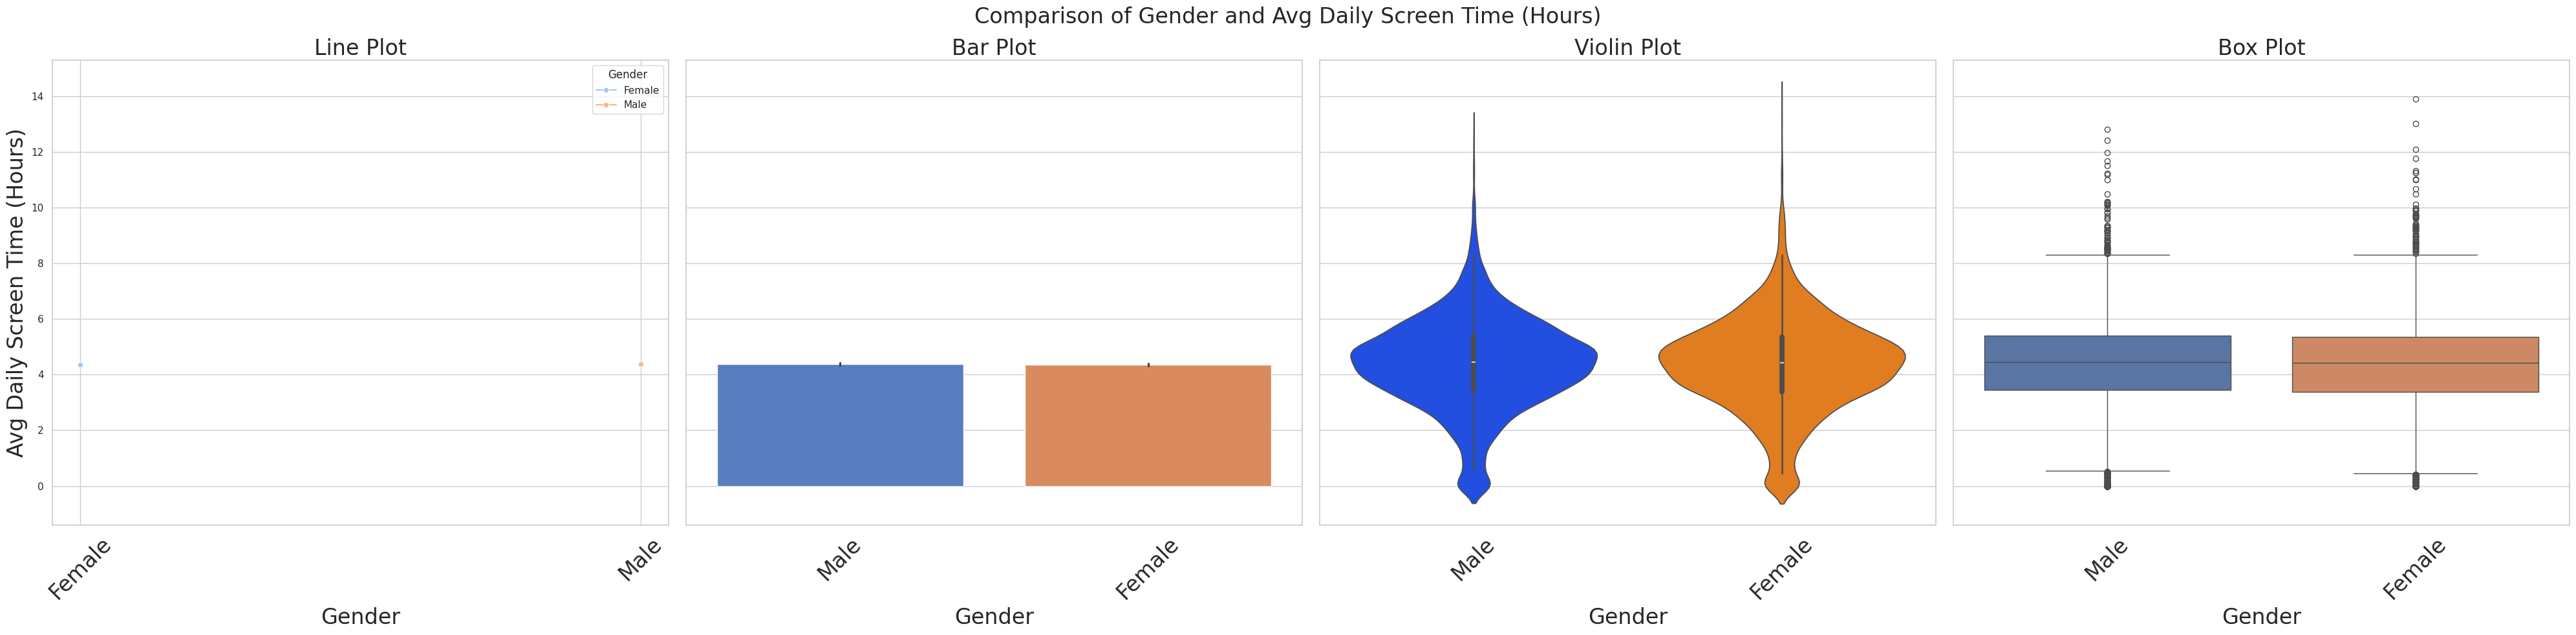

In [50]:
# Comparing Avg Screen time and Gender
fig, axes = plt.subplots(1, 4, figsize=(40,10), sharey=True)
plot_types = [
    ('line', 'Line Plot'),
    ('bar', 'Bar Plot'),
    ('violin', 'Violin Plot'),
    ('box', 'Box Plot')]
for i, (plot_type, title) in enumerate(plot_types):
    if plot_type == 'box':
        sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Gender', palette='deep')
    elif plot_type == 'violin':
        sns.violinplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Gender', palette='bright')
    elif plot_type == 'bar':
        sns.barplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Gender', palette='muted')
    elif plot_type == 'line':
        means = data.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
        sns.lineplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=means, ax=axes[i], hue='Gender', palette='pastel', marker='o')
    axes[i].set_title(title,fontsize=24)
    axes[i].set_xlabel('Gender',fontsize=24)
    axes[i].set_ylabel('Avg Daily Screen Time (Hours)' if i == 0 else '',fontsize=24)
    axes[i].tick_params(axis='x', rotation=45,labelsize=24)

plt.suptitle('Comparison of Gender and Avg Daily Screen Time (Hours)', fontsize=24)
plt.tight_layout()
plt.show()

**Interpretation**

It show the spread and density of screen times.

It suggests both genders have similar screen habits,Females may used high screen time.

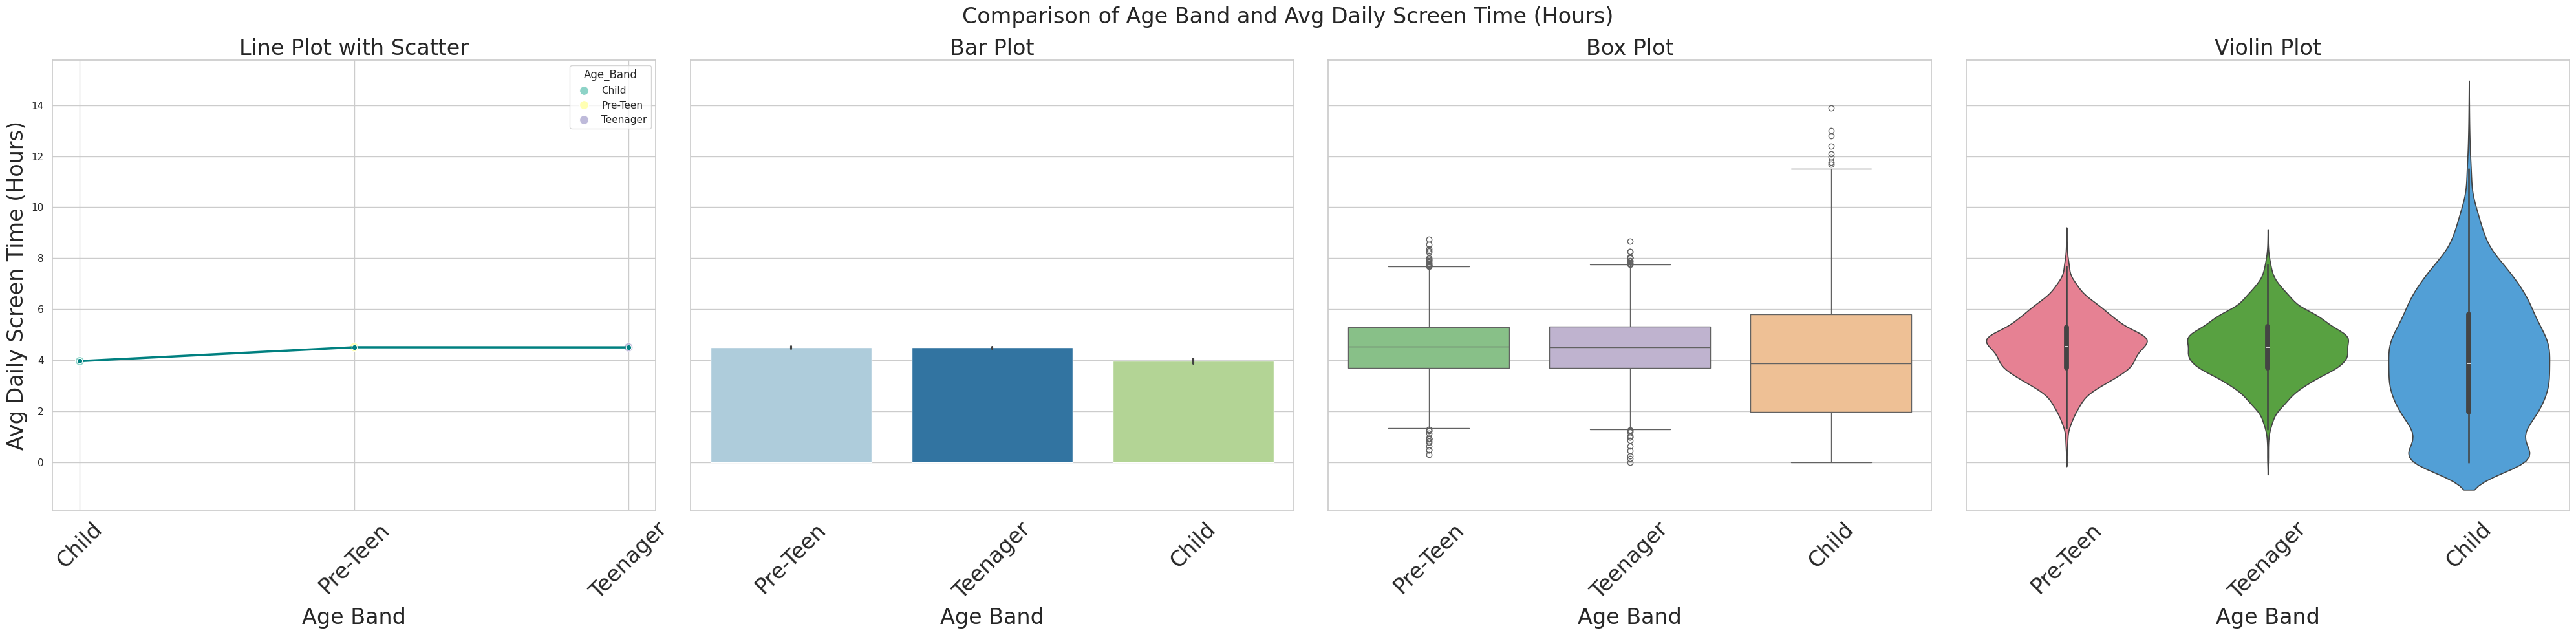

In [51]:
# Comparing Avg Screen time and Age_Band
fig, axes = plt.subplots(1, 4, figsize=(40,10), sharey=True)
plot_types = [
    ('line_scatter', 'Line Plot with Scatter'),
    ('bar', 'Bar Plot'),
    ('box', 'Box Plot'),
    ('violin', 'Violin Plot')]
for i, (plot_type, title) in enumerate(plot_types):
    if plot_type == 'box':
        sns.boxplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Age_Band', palette='Accent', legend=False)
    elif plot_type == 'violin':
        sns.violinplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Age_Band', palette='husl', legend=False)
    elif plot_type == 'bar':
        sns.barplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Age_Band', palette='Paired', legend=False)
    elif plot_type == 'line_scatter':
        means = data.groupby('Age_Band')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
        sns.lineplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=means, ax=axes[i], color='teal', linewidth=2.5, marker='o')
        sns.scatterplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=means, ax=axes[i], hue='Age_Band', palette='Set3', s=100)
    axes[i].set_title(title,fontsize=24)
    axes[i].set_xlabel('Age Band',fontsize=24)
    axes[i].set_ylabel('Avg Daily Screen Time (Hours)' if i == 0 else '',fontsize=24)
    axes[i].tick_params(axis='x', rotation=45,labelsize=24)

plt.suptitle('Comparison of Age Band and Avg Daily Screen Time (Hours)', fontsize=24)
plt.tight_layout()
plt.show()

**Interpretation**

With more outliers in older groups,teens not only has average more but also have extreme high users.

This suggests older kids spend more time on screens, possibly due to schoolwork or social media.

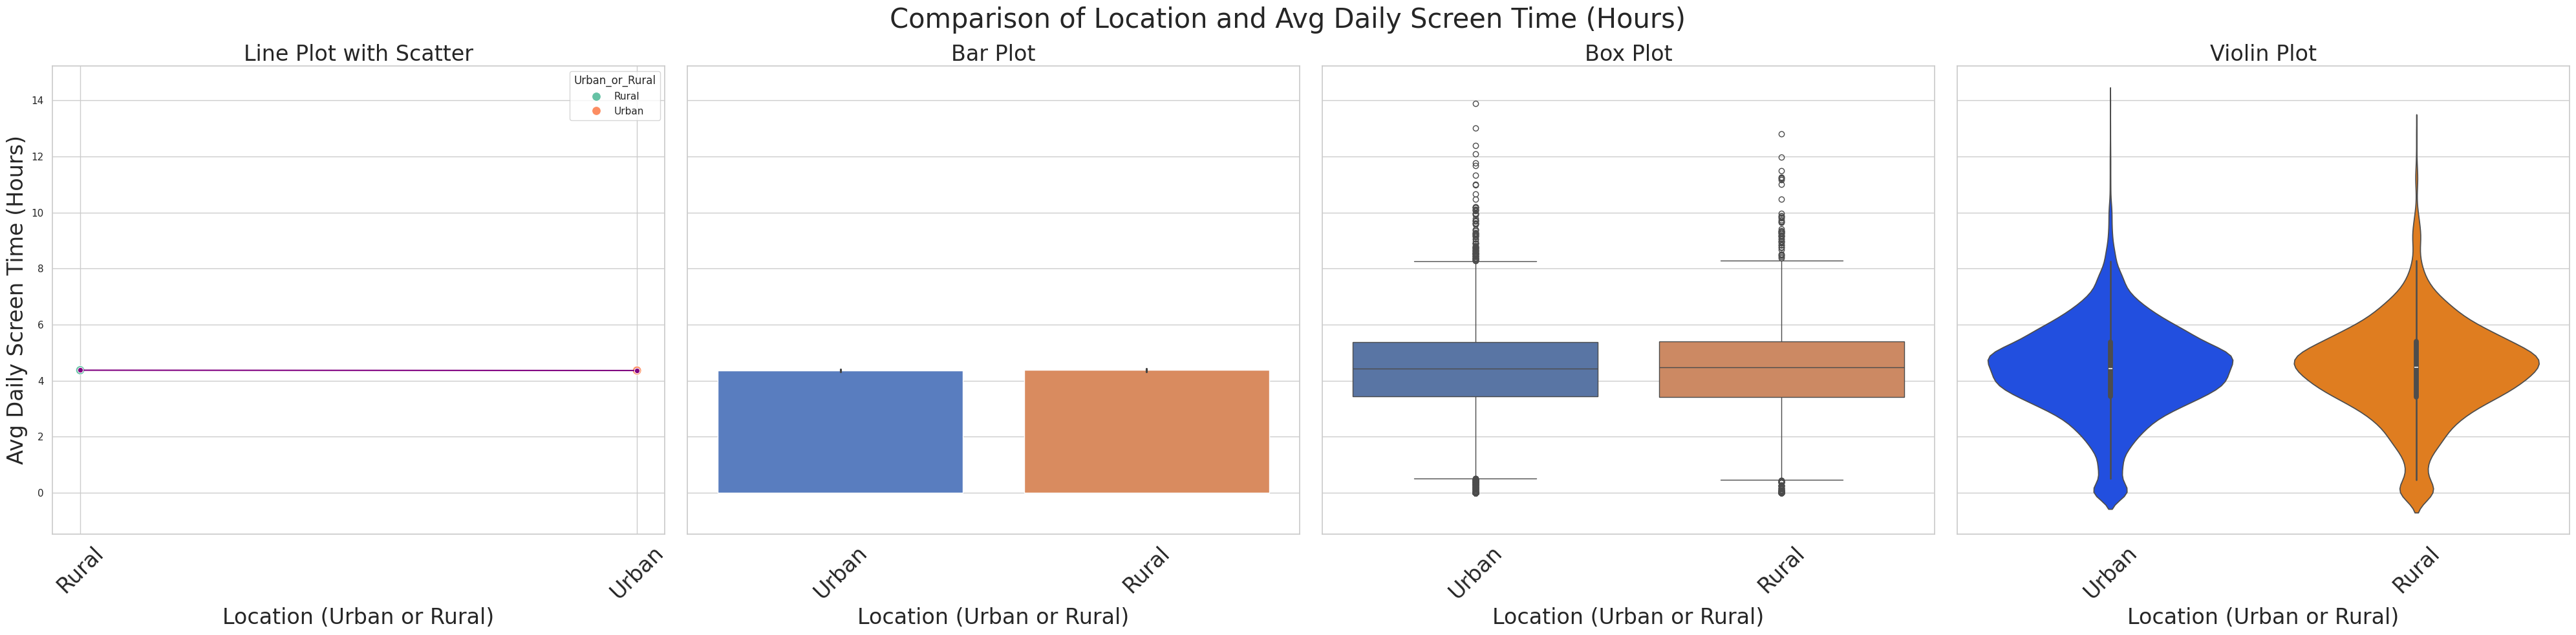

In [52]:
# Comparing Avg Screen time and Location (Rural or Urban)
fig, axes = plt.subplots(1, 4, figsize=(40,10), sharey=True)
plot_types = [
    ('line_scatter', 'Line Plot with Scatter'),
    ('bar', 'Bar Plot'),
    ('box', 'Box Plot'),
    ('violin', 'Violin Plot')]
for i, (plot_type, title) in enumerate(plot_types):
    if plot_type == 'box':
        sns.boxplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Urban_or_Rural', palette='deep', legend=False)
    elif plot_type == 'violin':
        sns.violinplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Urban_or_Rural', palette='bright', legend=False)
    elif plot_type == 'bar':
        sns.barplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=data, ax=axes[i], hue='Urban_or_Rural', palette='muted', legend=False)
    elif plot_type == 'line_scatter':
        means = data.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
        sns.lineplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=means, ax=axes[i], color='purple', marker='o')
        sns.scatterplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=means, ax=axes[i], hue='Urban_or_Rural', palette='Set2', s=100)
    axes[i].set_title(title,fontsize=24)
    axes[i].set_xlabel('Location (Urban or Rural)',fontsize=24)
    axes[i].set_ylabel('Avg Daily Screen Time (Hours)' if i == 0 else '',fontsize=24)
    axes[i].tick_params(axis='x', rotation=45,labelsize=24)

plt.suptitle('Comparison of Location and Avg Daily Screen Time (Hours)', fontsize=30)
plt.tight_layout()
plt.show()

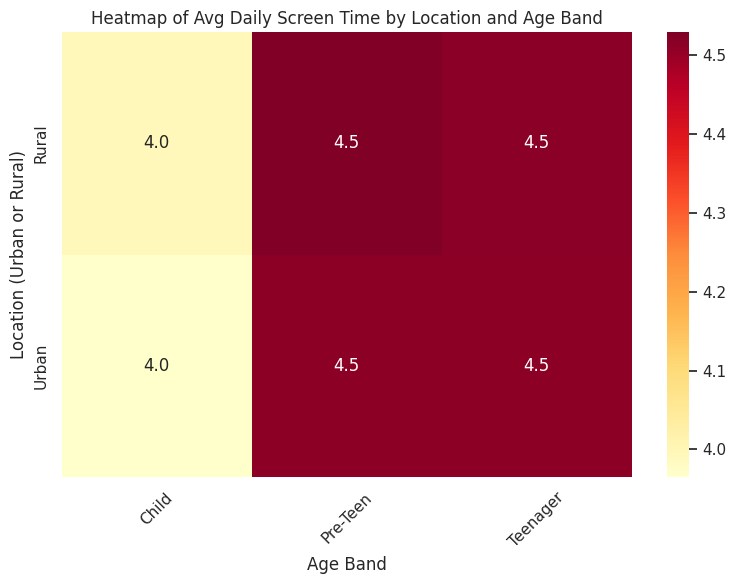

In [53]:
# heatmap for Comparing Avg Screen Time and Location
pivot_table = data.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Urban_or_Rural',
                              columns='Age_Band', aggfunc='mean', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Heatmap of Avg Daily Screen Time by Location and Age Band')
plt.xlabel('Age Band')
plt.ylabel('Location (Urban or Rural)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation**

The boxes show similar medians, but Urban might have more outliers.

This suggests urban areas have a wider range of screen habits.